In [21]:


mark_text = "One hundred years ago the Russian mathematician A. A. Markov founded a new branch of probability theory by applying mathematics to poetry. Delving into the text of Alexander Pushkin’s novel in verse Eugene Onegin , Markov spent hours sifting through patterns of vowels and consonants. On January 23, 1913, he summarized his findings in an address to the Imperial Academy of Sciences in St. Petersburg. His analysis did not alter the understanding or appreciation of Pushkin’s poem, but the technique he developed—now known as a Markov chain—extended the theory of probability in a new direction. Markov’s methodology went beyond coin-flipping and dice-rolling situations (where each event is independent of all others) to chains of linked events (where what happens next depends on the current state of the system)."

# expanded_text = ' '.join(expanded_words)
# print('Original text: ' + text)
# print('Expanded_text: ' + expanded_text)

# regex to keep only punctuation or words more than two letters long, may or may not contain an apostrophe in the middle
resume_string = re.findall(r"[a-z]+[']?[a-z]+|[.,]", mark_text.lower())
# adds things to out list of unwanted words
more_drops = ['state', 'city', 'name', 'company',
              'college', 'am', 'the', 'to', 'in']
# toss those words to the curbs
stop_dropped_resume = [w for w in resume_string if not w in more_drops]
# Here, we will expand contractions
expanded_words = []
for word in stop_dropped_resume:
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))



In [ ]:
import re
import string
import random
import re
import os
from numpy.random import choice
import contractions
# import contractions

"""LET'S GET STARTED"""

# open our file
with open('data/bri/data_stack_resumes.txt', 'r') as resume_script:
    # open txt file and read to string
    resume_file = resume_script.read()
    # lowercase everything in the string
    resume_file = resume_file.lower()
# r"(?=.*\w) ^ (\w |')+$"
# resume_string = re.findall(r"[a-z]+|[.,]", resume_file)
# resume_string = re.findall(r"[.,]|(\w+[']?\w){2,}", resume_file)
# re.sub(r"(\n)", "  ", resume_file)
resume_string = re.findall(r"[.,]|[a-z]+[']?[a-z]+", resume_file)
# adds things to out list of unwanted words
more_drops = ['state', 'city', 'name', 'company',
              'college', 'an', 'the', 'to', 'in', 'am']
# toss those words to the curbs
stop_dropped_resume = [w for w in resume_string if not w in more_drops]

expanded_words = []
for word in stop_dropped_resume:
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))
# resume_string2 = ' '.join(word for word in resume_string if len(word) > 2)
print(expanded_words)
# print(stop_dropped_resume[:1000])


In [2]:


import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
import pandas as pd
import numpy as np
import warnings
from collections import Counter


with open('data/bri/data_stack_resumes.txt', 'r') as resume_script:
    # open txt file and read to string
    resume_file = resume_script.read().lower()
    

# expanded_words = []
# # resume_file.split()
# for word in resume_file.split():
#   # using contractions.fix to expand the shortened words
#   expanded_words.append(contractions.fix(word))
# print(expanded_words)

# #convert it to dictionary with values and its occurences


# word_cloud_dict = Counter(expanded_words)

# wordcloud = WordCloud(
#     width=1000, height=500).generate_from_frequencies(word_cloud_dict)

# plt.figure(figsize=(15, 8))
# plt.imshow(wordcloud)
# plt.axis("off")
# #plt.show()
# plt.savefig('data/bri/word_cloud_counter.png', bbox_inches='tight')
# plt.close()
parriable = 'construction'
folder_path = f'data/Resume/{parriable.upper()}'
print(folder_path)


data/Resume/CONSTRUCTION


In [103]:
resume_dict = {}
# for loop that runs over every word in our string, but stating to stop at the last word
for i, word in enumerate(expanded_words[:-1]):
    # setting this word to be the word right after the one we were on
    this_word = expanded_words[i-1]
    # if this_word isn't in our dictionary already...
    if this_word not in resume_dict:
        # start our counter dict
        next_count = {}
        # add our new word to be a key in our resume dict and the count dict to be its value
        resume_dict[this_word] = next_count
    # if it is already in there....
    else:
        # create empty dictionary with this_word as the key and next_count as the value
        next_count = resume_dict[this_word]
    # if the next word(word) is in our nested dict already...
    if word in next_count:
        # add one to its count
        next_count[word] += 1
    # if its not already in there
    else:
        # lets add it and set its count to 1
        next_count[word] = 1


In [ ]:
import matplotlib.pyplot as plt

# get inner keys
inner_keys = list(resume_dict.values()[0]).keys()

# x-axis is the outer keys
x_axis_values = list(map(str, resume_dict.keys()))

# loop through inner_keys
for x in inner_keys:

    # create a list of values for inner key
    y_axis_values = [v[x] for v in resume_dict.values()]

    # plot each inner key
    plt.plot(x_axis_values, y_axis_values, label=x)

plt.legend()


In [104]:
import json
import pandas as pd

with open("finished_resumes/marc_graph.json", "w") as jason:
    json.dump(resume_dict, jason, indent=3)
# json.dumps(resume_dict, sort_keys=True, indent=3))
df = pd.read_json("finished_resumes/mark_graph.json")


ValueError: Unexpected character found when decoding 'false'

In [23]:
import csv


with open('finished_resumes/full_data_stacked.csv', "wb") as f:
    w = csv.DictWriter(f, fields)
    w.writeheader()
    for k in dw:
        w.writerow({field: dw[k].get(field) or k for field in fields})


NameError: name 'fields' is not defined

In [ ]:
from networkx.drawing.nx_pydot import write_dot
import networkx as nx
import matplotlib.pyplot as plt

states = [(0, 0),
          (1, 0),
          (2, 0),]


Q = [[5, 5, 0.4],
     [1, 2, 3],
     [4, 0.7, 0]
     ]

# G = nx.DiGraph()
G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state, destination_state, weight=rate, label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)



plt.figure(figsize=(10,7))
node_size = 200
pos = {state:list(state) for state in states}
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.axis('off');
plt.show()

write_dot(G, 'mc.dot')

from subprocess import check_call
nfile = 'w.png' 
check_call(['dot', '-Tpng', 'mc.dot', '-o', nfile])

import matplotlib.image as mpimg
img = mpimg.imread(nfile)
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
import json
import random
import string

from typing import Optional
from os import path

from constants import *


class Table:
    """
    Table is an abstraction for table in draw.io
    """

    def __init__(self, name: str, rows: Optional[dict] = None) -> None:
        """
        Init method for table
        :param name: Name of table
        :param rows: Rows in table
        """
        self.name = name
        self.rows = rows if rows else dict()


class Page:
    def __init__(self):
        """
        Page is an abstraction for whole page in draw.io.
        There are objects on a page
        """
        self.tables = []

    def export(self, to_file: Optional[str] = DEFAULT_FILE_NAME) -> None:
        """
        Main method that converts tables on a page into xml (drawio format)
        :param to_file: Path of resulting .drawio file
        """
        # check tables are correct
        self.overall_check(to_file)

        table_x_axis = BASE_START_TABLE_X_AXIS
        main_str = ""  # all text is written here
        for table in self.tables:
            # configuring table id and height
            table_id = self.gen_id()
            table_height = BASE_START_ROW_Y_AXIS * (len(table.rows) + 1)
            # adding table to main_str
            main_str += BASE_TABLE.format(table.name,
                                          table_id,
                                          table_x_axis,
                                          table_height)

            row_y_axis = BASE_START_ROW_Y_AXIS
            for r_key, r_value in table.rows.items():
                # configuring id and row value for row
                row_id = self.gen_id()
                row_value = f"{r_key}: {r_value}"
                # adding row to table
                main_str += BASE_ROW.format(row_id,
                                            row_value,
                                            table_id,
                                            row_y_axis)
                row_y_axis += BASE_START_ROW_Y_AXIS
            table_x_axis += BASE_TABLE_X_AXIS_DIFFERENCE

        # adding all text to main XML code
        export_string = BASE_PAGE.format(main_str)
        # saving to file
        with open(to_file, "w") as f:
            f.write(export_string)
        return

    def add_table(self, table: Table) -> None:
        """
        Method that adds table to page
        :param table: Table that will be added
        """
        self.tables.append(table)

    def overall_check(self, f_name: str) -> None:
        """
        Method that checks all tables and name of resulting file
        before exporting.
        :param f_name: name of a resulting file
        """
        if not f_name.endswith(".drawio"):
            raise Exception("Resulting file must end with .drawio")
        for table in self.tables:
            # check for mandatory fields in table (Default none)
            # check for MANDATORY_TYPES variable
            self.check_mandatory(table.rows)
            # check if row value types are correct
            # check for ACCEPTABLE_VALUE_TYPES variable
            # to turn it off set CHECK_VALUE_ENABLED to False
            if CHECK_VALUE_ENABLED:
                for elm in table.rows.values():
                    self.check_value(elm)

    def import_from_json(self, path_to_json: str) -> None:
        """
        Method that:
        - imports data from json file
        - converts to Table
        - appends it to self.tables variable
        :param path_to_json: name of json file
        """
        # check if json exists and in correct extension
        self.check_json(path_to_json)
        # load file
        with open(path_to_json, "r") as f:
            raw_json = json.load(f)
        # check file if not empty
        if len(raw_json) == 0:
            raise Exception("file is empty")
        for key, value in raw_json.items():
            # checking row
            self.check_row(value)
            # transforming data to Table and appending
            self.tables.append(Table(key, value))

    @staticmethod
    def gen_id() -> str:
        """
        Method that generates random id
        for table and rows
        """
        # symbols from which id is made
        chars = string.ascii_uppercase + string.digits
        return ''.join(random.choice(chars) for _ in range(ID_LENGTH))

    @staticmethod
    def check_value(value: str) -> None:
        """
        Method that checks if a row value is in allowed format
        :param value: value type of row
        """
        if value not in ACCEPTABLE_VALUE_TYPES:
            raise Exception(f"Type {value} is not allowed to be a value")

    @staticmethod
    def check_mandatory(table: dict) -> None:
        """
        Method that checks if there are required keys in table
        :param table: all rows
        """
        for elm in MANDATORY_TYPES:
            if elm not in table:
                raise Exception(f"{elm} not found in table")

    @staticmethod
    def check_json(name: str) -> None:
        """
        Method that checks if json file is correct
        :param name: name of json file
        """
        # if it exists
        if not path.exists(name):
            raise Exception("File not found")
        # if it is in json format
        if not name.endswith(".json"):
            raise Exception("File does not end with .json")

    @staticmethod
    def check_row(row: dict) -> None:
        """
        Method that checks if row is in needed type
        Allowed types:
        - string
        - number
        :param row: a row {"key": "value"}
        """
        for value in row.values():
            if type(value) not in [str, int, float, complex]:
                raise Exception("child value is not acceptable")

In [24]:

"""CREATE OUR NESTED DICT TO SAVE HOW OFTEN ONE WORD FOLLOWS ANOTHER"""
import json


print(json.dumps(resume_dict, indent=3))



{
   ".": {
      "one": 1,
      ".": 1,
      "markov": 2,
      "delving": 1,
      "on": 1,
      "petersburg": 1,
      "his": 1
   },
   "one": {
      "hundred": 1
   },
   "hundred": {
      "years": 1
   },
   "years": {
      "ago": 1
   },
   "ago": {
      "russian": 1
   },
   "russian": {
      "mathematician": 1
   },
   "mathematician": {
      ".": 1
   },
   "markov": {
      "founded": 1,
      "spent": 1,
      "chain": 1,
      "methodology": 1
   },
   "founded": {
      "new": 1
   },
   "new": {
      "branch": 1,
      "direction": 1
   },
   "branch": {
      "of": 1
   },
   "of": {
      "probability": 2,
      "alexander": 1,
      "vowels": 1,
      "sciences": 1,
      "pushkin": 1,
      "all": 1,
      "linked": 1,
      "system": 1
   },
   "probability": {
      "theory": 1,
      "new": 1
   },
   "theory": {
      "by": 1,
      "of": 1
   },
   "by": {
      "applying": 1
   },
   "applying": {
      "mathematics": 1
   },
   "mathematics": {
     

TypeError: 'dict_values' object is not subscriptable

In [102]:
import json
import pandas as pd

with open("finished_resumes/marc_graph.json", "w") as jason:
    json.dump(resume_dict, jason, indent=3)
# json.dumps(resume_dict, sort_keys=True, indent=3))
df = pd.read_json("finished_resumes/mark_graph.json")
# df = df.T
# df.to_csv("finished_resumes/mark_graph.csv")


ValueError: Unexpected character found when decoding 'false'

In [25]:
"""START THE STORY"""

# starting out story off blank
story = []
# Pick the first word at random from our initial string
first_word = random.choice(stop_dropped_resume)
# while loop to make sure we dont start on punctuation
while first_word in string.punctuation:
    # if it was punctuation, choose again
    first_word = random.choice(stop_dropped_resume)
# if story is blank...
if story == []:
    # set story up with our first word
    story.append(first_word)
print(story)



['markov']


In [124]:
import json
import random
import string

from typing import Optional
from os import path

from constants import *
path_to_json = "finished_resumes/marc_graph.json"

class Table:
    """
    Table is an abstraction for table in draw.io
    """

    def __init__(self, name: str, rows: Optional[dict] = None) -> None:
        """
        Init method for table
        :param name: Name of table
        :param rows: Rows in table
        """
        self.name = name
        self.rows = rows if rows else dict()


class Page:
    def __init__(self):
        """
        Page is an abstraction for whole page in draw.io.
        There are objects on a page
        """
        self.tables = []

    def export(self, to_file: Optional[str] = DEFAULT_FILE_NAME) -> None:
        """
        Main method that converts tables on a page into xml (drawio format)
        :param to_file: Path of resulting .drawio file
        """
        # check tables are correct
        self.overall_check(to_file)

        table_x_axis = BASE_START_TABLE_X_AXIS
        main_str = ""  # all text is written here
        for table in self.tables:
            # configuring table id and height
            table_id = self.gen_id()
            table_height = BASE_START_ROW_Y_AXIS * (len(table.rows) + 1)
            # adding table to main_str
            main_str += BASE_TABLE.format(table.name,
                                          table_id,
                                          table_x_axis,
                                          table_height)

            row_y_axis = BASE_START_ROW_Y_AXIS
            for r_key, r_value in table.rows.items():
                # configuring id and row value for row
                row_id = self.gen_id()
                row_value = f"{r_key}: {r_value}"
                # adding row to table
                main_str += BASE_ROW.format(row_id,
                                            row_value,
                                            table_id,
                                            row_y_axis)
                row_y_axis += BASE_START_ROW_Y_AXIS
            table_x_axis += BASE_TABLE_X_AXIS_DIFFERENCE

        # adding all text to main XML code
        export_string = BASE_PAGE.format(main_str)
        # saving to file
        with open(to_file, "w") as f:
            f.write(export_string)
        return

    def add_table(self, table: Table) -> None:
        """
        Method that adds table to page
        :param table: Table that will be added
        """
        self.tables.append(table)

    def overall_check(self, f_name: str) -> None:
        """
        Method that checks all tables and name of resulting file
        before exporting.
        :param f_name: name of a resulting file
        """
        if not f_name.endswith(".drawio"):
            raise Exception("Resulting file must end with .drawio")
        for table in self.tables:
            # check for mandatory fields in table (Default none)
            # check for MANDATORY_TYPES variable
            self.check_mandatory(table.rows)
            # check if row value types are correct
            # check for ACCEPTABLE_VALUE_TYPES variable
            # to turn it off set CHECK_VALUE_ENABLED to False
            if CHECK_VALUE_ENABLED:
                for elm in table.rows.values():
                    self.check_value(elm)

    def import_from_json(self, path_to_json: str) -> None:
        """
        Method that:
        - imports data from json file
        - converts to Table
        - appends it to self.tables variable
        :param path_to_json: name of json file
        """
        # check if json exists and in correct extension
        self.check_json(path_to_json)
        # load file
        with open(path_to_json, "r") as f:
            raw_json = json.load(f)
        # check file if not empty
        if len(raw_json) == 0:
            raise Exception("file is empty")
        for key, value in raw_json.items():
            # checking row
            self.check_row(value)
            # transforming data to Table and appending
            self.tables.append(Table(key, value))

    @staticmethod
    def gen_id() -> str:
        """
        Method that generates random id
        for table and rows
        """
        # symbols from which id is made
        chars = string.ascii_uppercase + string.digits
        return ''.join(random.choice(chars) for _ in range(ID_LENGTH))

    @staticmethod
    def check_value(value: str) -> None:
        """
        Method that checks if a row value is in allowed format
        :param value: value type of row
        """
        if value not in ACCEPTABLE_VALUE_TYPES:
            raise Exception(f"Type {value} is not allowed to be a value")

    @staticmethod
    def check_mandatory(table: dict) -> None:
        """
        Method that checks if there are required keys in table
        :param table: all rows
        """
        for elm in MANDATORY_TYPES:
            if elm not in table:
                raise Exception(f"{elm} not found in table")

    @staticmethod
    def check_json(name: str) -> None:
        """
        Method that checks if json file is correct
        :param name: name of json file
        """
        # if it exists
        if not path.exists(name):
            raise Exception("File not found")
        # if it is in json format
        if not name.endswith(".json"):
            raise Exception("File does not end with .json")

    @staticmethod
    def check_row(row: dict) -> None:
        """
        Method that checks if row is in needed type
        Allowed types:
        - string
        - number
        :param row: a row {"key": "value"}
        """
        for value in row.values():
            if type(value) not in [str, int, float, complex]:
                raise Exception("child value is not acceptable")

NameError: name 'DEFAULT_FILE_NAME' is not defined

In [116]:
for outer_word, inner_dict in resume_dict.items():
    # get the next words and instances
    outer_word = outer_word
    print(outer_word)
    print(inner_dict)
    total_occurances = inner_dict.values()
    for key, value in inner_dict.items():
        dict_key = key
        dict_value = value
    # seperate the instances
    
        # print(word_self_total)

.
{'one': 1, '.': 1, 'markov': 2, 'delving': 1, 'on': 1, 'petersburg': 1, 'his': 1}
one
{'hundred': 1}
hundred
{'years': 1}
years
{'ago': 1}
ago
{'russian': 1}
russian
{'mathematician': 1}
mathematician
{'.': 1}
markov
{'founded': 1, 'spent': 1, 'chain': 1, 'methodology': 1}
founded
{'new': 1}
new
{'branch': 1, 'direction': 1}
branch
{'of': 1}
of
{'probability': 2, 'alexander': 1, 'vowels': 1, 'sciences': 1, 'pushkin': 1, 'all': 1, 'linked': 1, 'system': 1}
probability
{'theory': 1, 'new': 1}
theory
{'by': 1, 'of': 1}
by
{'applying': 1}
applying
{'mathematics': 1}
mathematics
{'poetry': 1}
poetry
{'.': 1}
delving
{'into': 1}
into
{'text': 1}
text
{'of': 1}
alexander
{'pushkin': 1}
pushkin
{'novel': 1, 'poem': 1}
novel
{'verse': 1}
verse
{'eugene': 1}
eugene
{'onegin': 1}
onegin
{',': 1}
,
{'markov': 1, ',': 1, 'he': 1, 'but': 1}
spent
{'hours': 1}
hours
{'sifting': 1}
sifting
{'through': 1}
through
{'patterns': 1}
patterns
{'of': 1}
vowels
{'and': 1}
and
{'consonants': 1, 'dice': 1}
co

In [122]:
import altair as alt
import pandas as pd
import numpy as np

df = pd.concat({k: pd.DataFrame(d) for k, d in resume_dict.items()})
df = df.reset_index(0).rename({'level_0': 'id'}, axis=1)
alt.Chart(df).mark_line().encode(x='outer_word',y='value',index = 'key', color='id:N')


ValueError: If using all scalar values, you must pass an index

ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

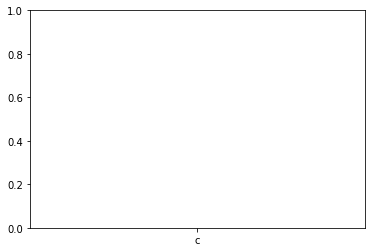

In [118]:
import matplotlib.pyplot as plt

# get inner keys
inner_keys = list(dict_key)

# x-axis is the outer keys
x_axis_values = list(map(str, outer_word))

# loop through inner_keys


    # create a list of values for inner key
y_axis_values = value

    # plot each inner key
plt.plot(x_axis_values, y_axis_values, label=x)

plt.legend()


In [99]:
"""CREATE THE WEIGHTED PROB ALGORITHM TO DETERMINE THE NEXT WORD"""

# function to get the next word using weighted probability


def whos_next():
    # set our current word to be the last word of the story string
    current_word = story[-1]
    # pick out our nested dict for specific word
    for outer_word, inner_dict in resume_dict.items():
        # get the next words and instances
        word_self_total = inner_dict.items()
        # seperate the instances
        total_occurances = inner_dict.values()
        # pull the dictionary for the current word
        if outer_word == current_word:
            # add the total times a word followed current word
            total = sum(total_occurances)
            # set empty variable for the percent chance of each word occuring
            probs = []
            # set a list of all words that came after current word
            hopefuls = []
            # set an empty list to grab the count of each word
            likely = []
            # pull every number of times each word came after current
            for number in total_occurances:
                # factor the percent chance of a word being next
                percent = number / total
                # add each percent to our probs list
                probs.append(percent)
            # pull words and their values from our inner dict
            for word, num in word_self_total:
                # add each word to our hopefuls list
                hopefuls.append(word)
                # add each number to our likely list
                likely.append(num)
            # making our rng_says a global variable
            global rng_says
            # weighted rng based off the percent probability of word occuring
            rng_says = choice(hopefuls, p=probs)
            # change rng output from numpy to string
            next_word = str(rng_says)
            # add our next word string to the story
            story.append(next_word)
whos_next()

# mark_text = "One hundred years ago the Russian mathematician A. A. Markov founded a new branch of probability theory by applying mathematics to poetry. Delving into the text of Alexander Pushkin’s novel in verse Eugene Onegin , Markov spent hours sifting through patterns of vowels and consonants. On January 23, 1913, he summarized his findings in an address to the Imperial Academy of Sciences in St. Petersburg. His analysis did not alter the understanding or appreciation of Pushkin’s poem, but the technique he developed—now known as a Markov chain—extended the theory of probability in a new direction. Markov’s methodology went beyond coin-flipping and dice-rolling situations (where each event is independent of all others) to chains of linked events (where what happens next depends on the current state of the system)."
print(story)

['markov', 'chain', 'extended', 'theory', 'by', 'applying', 'mathematics', 'poetry', '.', 'markov', 'spent', 'hours', 'sifting', 'through', 'patterns', 'of', 'pushkin', 'poem', ',', ',', 'markov', 'methodology', 'went', 'beyond', 'coin', 'flipping', 'and', 'consonants', '.', 'markov', 'methodology', 'went', 'beyond', 'coin', 'flipping', 'and', 'dice', 'rolling', 'situations', 'where', 'what', 'happens', 'next', 'depends', 'on', 'current', 'of', 'pushkin', 'novel', 'verse', 'eugene', 'onegin', ',', 'but', 'technique', 'he', 'summarized', 'his', 'analysis', 'did', 'not', 'alter', 'understanding', 'or', 'appreciation', 'of', 'system']


In [33]:
while len(story) < 400:
    whos_next()
whole_story = ' '.join(story)
print(whole_story)


KeyboardInterrupt: 

In [12]:
"""ADD WORDS TO OUR STORY, DROP WHITE SPACE, CAPITALIZE, AND NEWLINE"""
# story = ['markov', 'chain', 'extended', 'theory', 'by', 'applying', 'mathematics', 'poetry', '.', 'markov', 'methodology', 'went', 'beyond', 'coin', 'flipping', 'and', 'consonants', '.', 'petersburg', '.', 'markov', 'spent', 'hours', 'sifting', 'through', 'patterns',
#          'of', 'probability', 'theory', 'by', 'applying', 'mathematics', 'poetry', '.', 'his', 'findings', 'an', 'address', 'imperial', 'academy', 'of', 'linked', 'events', 'where', 'each', 'event', 'is', 'independent', 'of', 'vowels', 'and', 'consonants', '.', ]

while len(story) < 400:
    # call our function
    whos_next()
# set our full story to be

whole_story = ' '.join(story)
print(whole_story)



KeyboardInterrupt: 

In [13]:
# replace white space preceding punctuation
whole_story = re.sub(r'\s([?.,!](?:\s|$))', r'\1', whole_story)
# resplit the story, this time on sentences
sentences = re.split('[?.]', whole_story)

# set a new clean variable
cap_sent = []
# for every sentense in our story...
for sentence in sentences:
    # strip the left white space and capitalize the first word and add it to a new list
    cap_sent.append((sentence.lstrip().capitalize() + '.'))
# turn our story back into a string by joining them back in together
cap_sent = ' '.join(cap_sent)


In [45]:
# back to splitting our text on periods
splittext = cap_sent.split(".")
# for every 5 to 10 sentences...
for x in range(4, len(splittext), random.randint(5, 8)):
    # add a new line and start the next sentence tabbed in
    splittext[x] = "\n"+"\t"+splittext[x].lstrip()
# throw it all back together into a string
text = ".".join(splittext)
# add a tab to the first line so it matches its friends
text = f'\t'+text
print(text)

	Markov chain extended theory by applying mathematics poetry. Markov methodology went beyond coin flipping and consonants. Petersburg. Markov spent hours sifting through patterns of probability theory by applying mathematics poetry.
	His findings an address imperial academy of linked events where each event is independent of vowels and consonants. .


In [10]:
""""SPELL CHECK AND SAVE"""
import language_tool_python
# set our spell check function to english and assign it to a variable

tool = language_tool_python.LanguageTool('en-US')
# set our checker to autocorrect
checked_text = tool.correct(cap_sent)
# open a new file in the generated resume folder
text_file = open(f'finished_resumes/marks_mark.txt', 'w')
# write our resume to it
text_file.write(checked_text)
# shut it down. our work here is done
text_file.close()





AttributeError: 'str' object has no attribute 'items'